univariate analysis  
numerical: box plot, dist plot, hist plot  
catergory: count plot  

multivariate analysis


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('metrics_per_product.csv')

In [9]:
# Convert 'OrderDate' to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Set 'OrderDate' as the index
df.set_index('OrderDate', inplace=True)

In [10]:
df.head()

,ProductCategoryName,SalesAmount,Average Profit Margin,OrderQty,UnitPrice,UnitPriceDiscount,TaxAmt,Freight,Average_Revenue_Per_User
OrderDate,,,,,,,,,
2011-05-31,Accessories,1069.8845,447.905061,72.0,464.2895,0.0,85.590760,26.747106,82.298808
2011-05-31,Bikes,413833.4929,-2915.048050,413.0,195999.4738,0.0,33106.679432,10345.837305,10345.837322
2011-05-31,Clothing,2071.1596,-906.125246,148.0,715.0269,0.0,165.692768,51.778989,94.143618
2011-05-31,Components,25185.8746,-1040.167617,102.0,14250.0435,0.0,2014.869968,629.646863,1679.058307
2011-05-31,Other,0.0000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,NaN


In [11]:
df['ProductCategoryName'] = df['ProductCategoryName'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5620 entries, 2011-05-31 to 2014-06-30
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProductCategoryName       5620 non-null   category
 1   SalesAmount               5620 non-null   float64 
 2   Average Profit Margin     5620 non-null   float64 
 3   OrderQty                  5620 non-null   float64 
 4   UnitPrice                 5620 non-null   float64 
 5   UnitPriceDiscount         5620 non-null   float64 
 6   TaxAmt                    5620 non-null   float64 
 7   Freight                   5620 non-null   float64 
 8   Average_Revenue_Per_User  1977 non-null   float64 
dtypes: category(1), float64(8)
memory usage: 400.9 KB


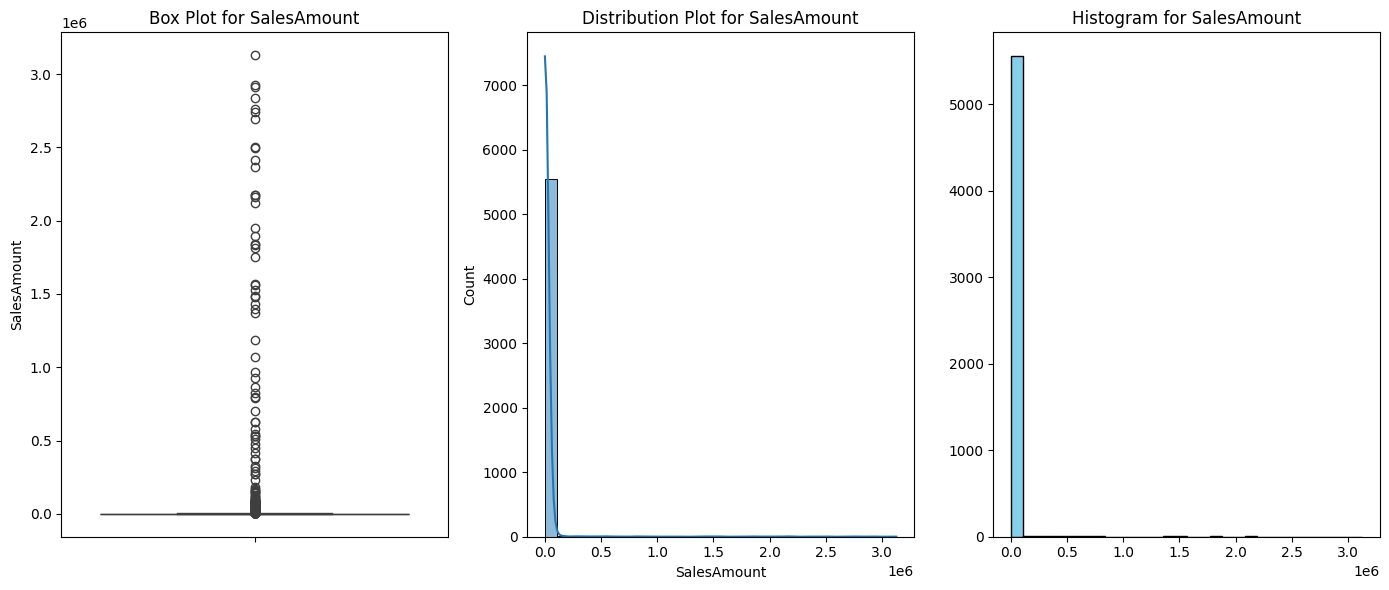

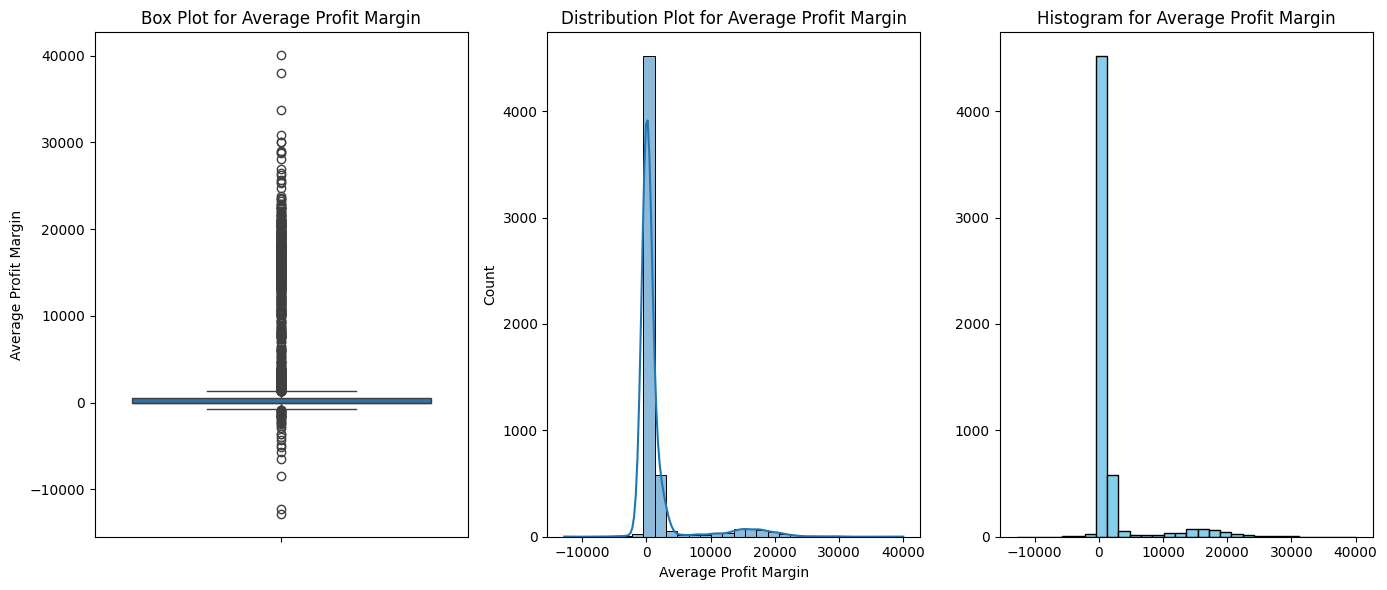

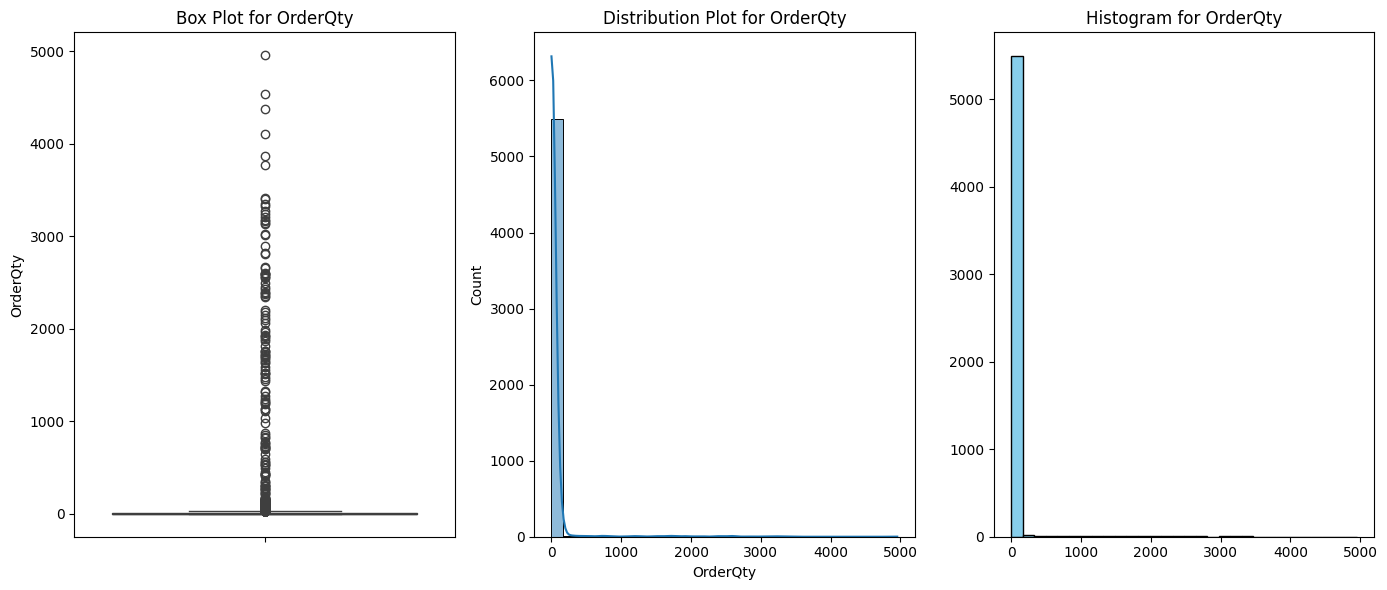

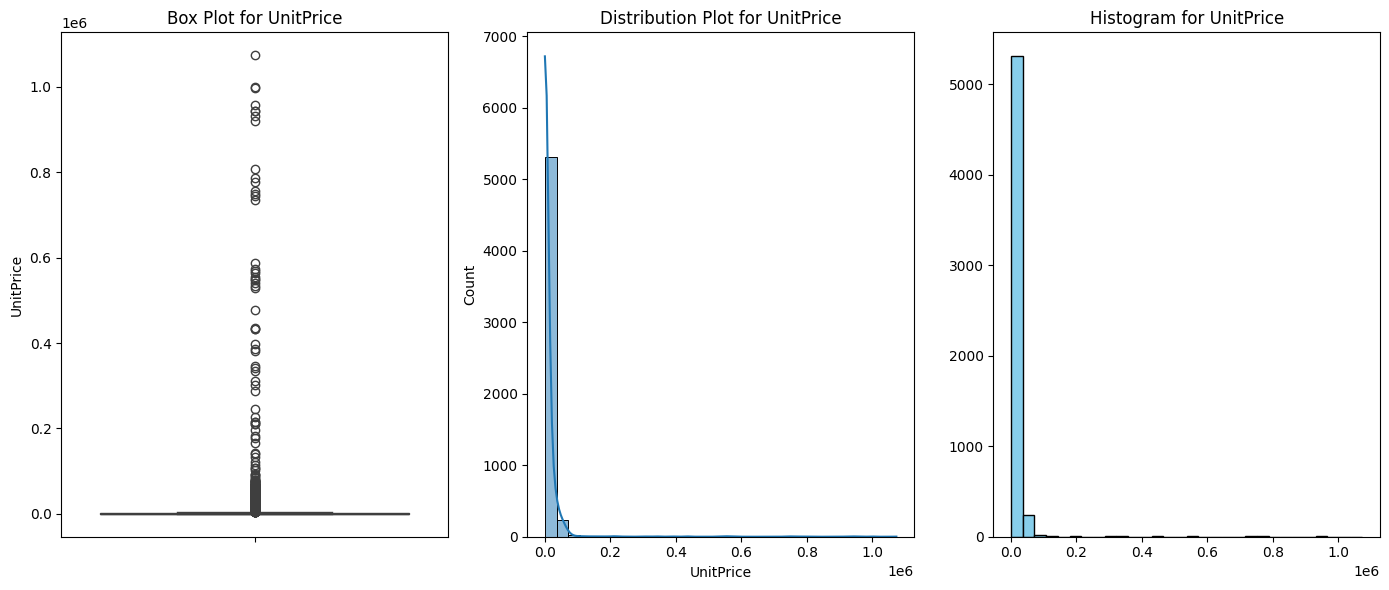

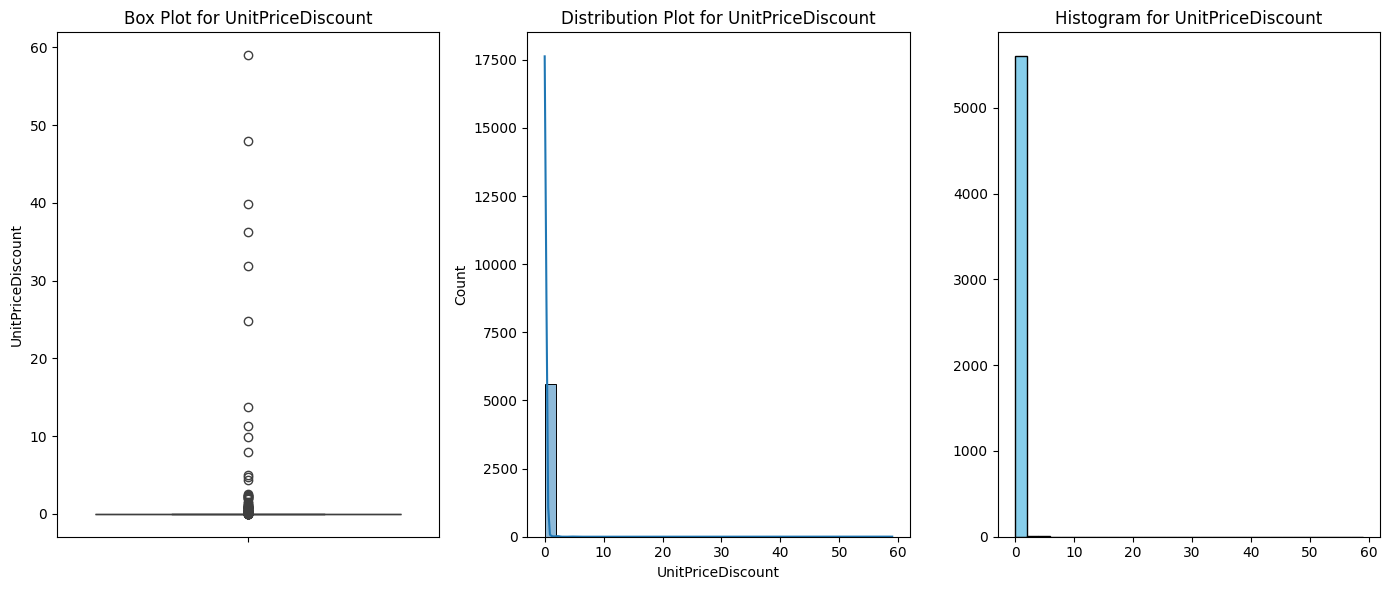

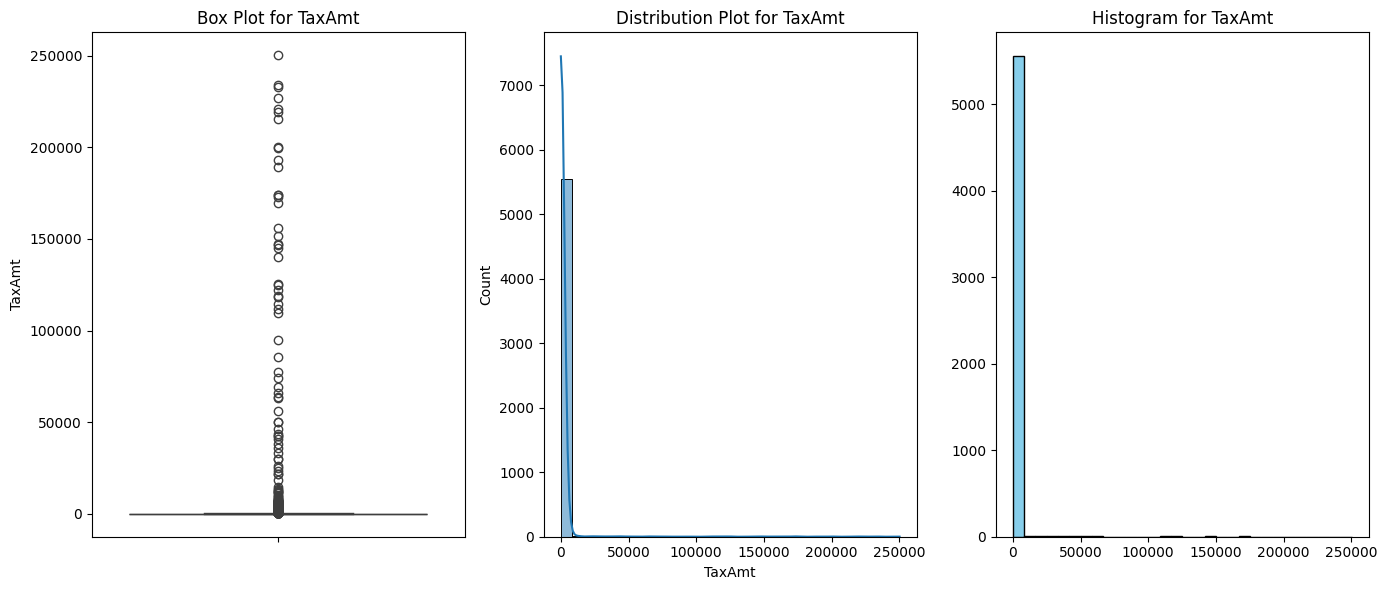

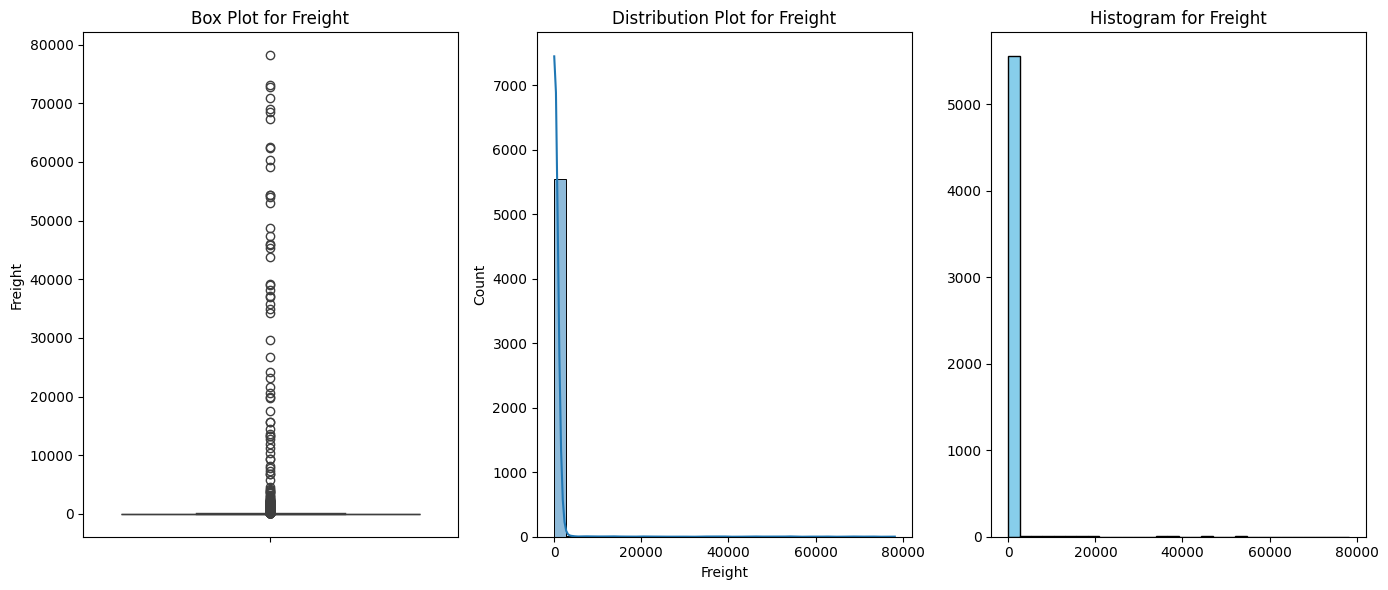

In [25]:
# Assume FactSales is your DataFrame
numeric_cols = df.select_dtypes(include='number').columns  # Select only numeric columns

numeric_cols = numeric_cols.drop('Average_Revenue_Per_User')

# Create a directory of plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(14, 6))
    
    # Box Plot
    plt.subplot(1, 3, 1)  # Create subplot (1 row, 3 columns, 1st plot)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    
    # Dist Plot
    plt.subplot(1, 3, 2)  # Create subplot (1 row, 3 columns, 2nd plot)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution Plot for {col}')
    
    # Hist Plot
    plt.subplot(1, 3, 3)  # Create subplot (1 row, 3 columns, 3rd plot)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

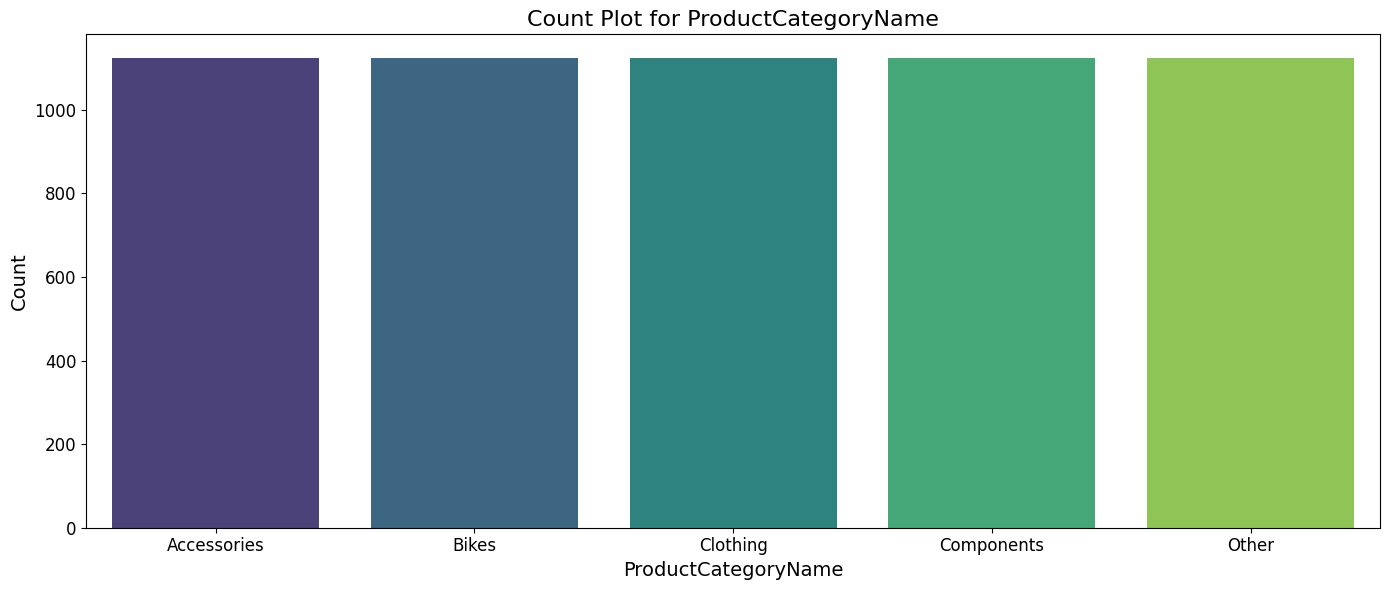

In [26]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='ProductCategoryName', hue='ProductCategoryName', palette='viridis', legend=False)

# Customize the plot
plt.title('Count Plot for ProductCategoryName', fontsize=16)
plt.xlabel('ProductCategoryName', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

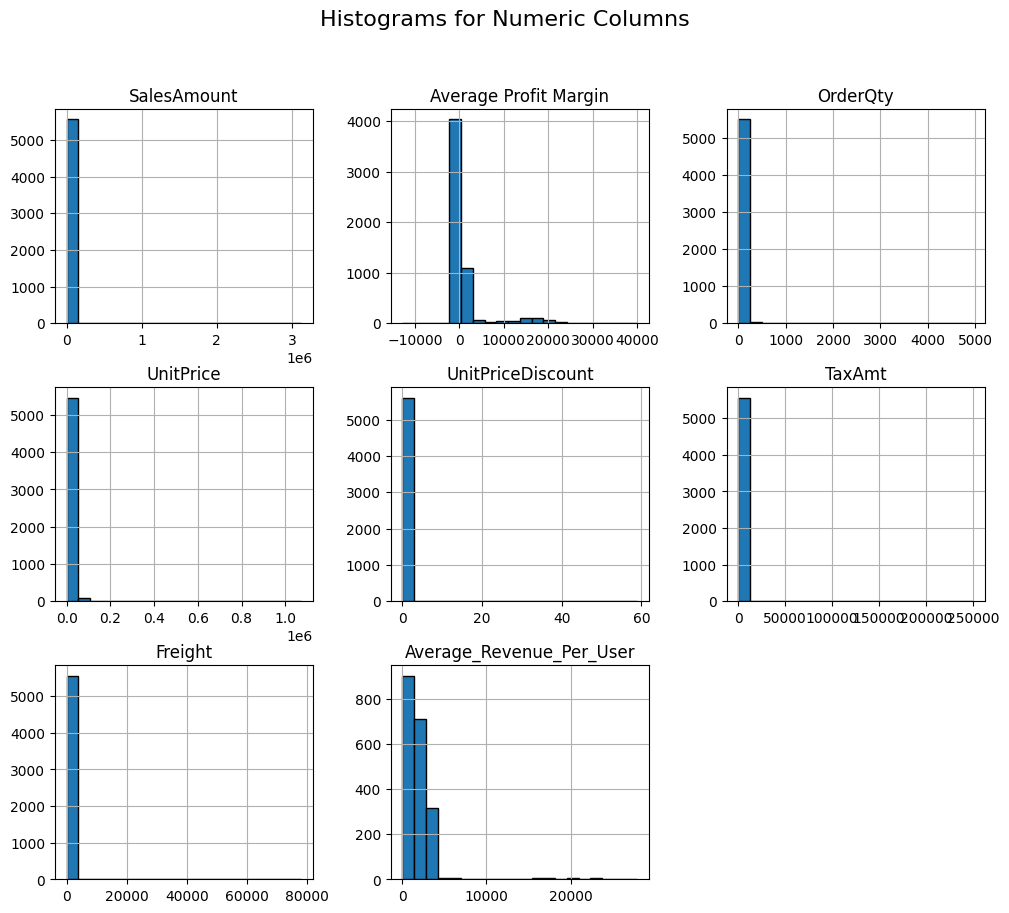

In [27]:
# Histograms for all numeric columns
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms for Numeric Columns", fontsize=16)
plt.show()


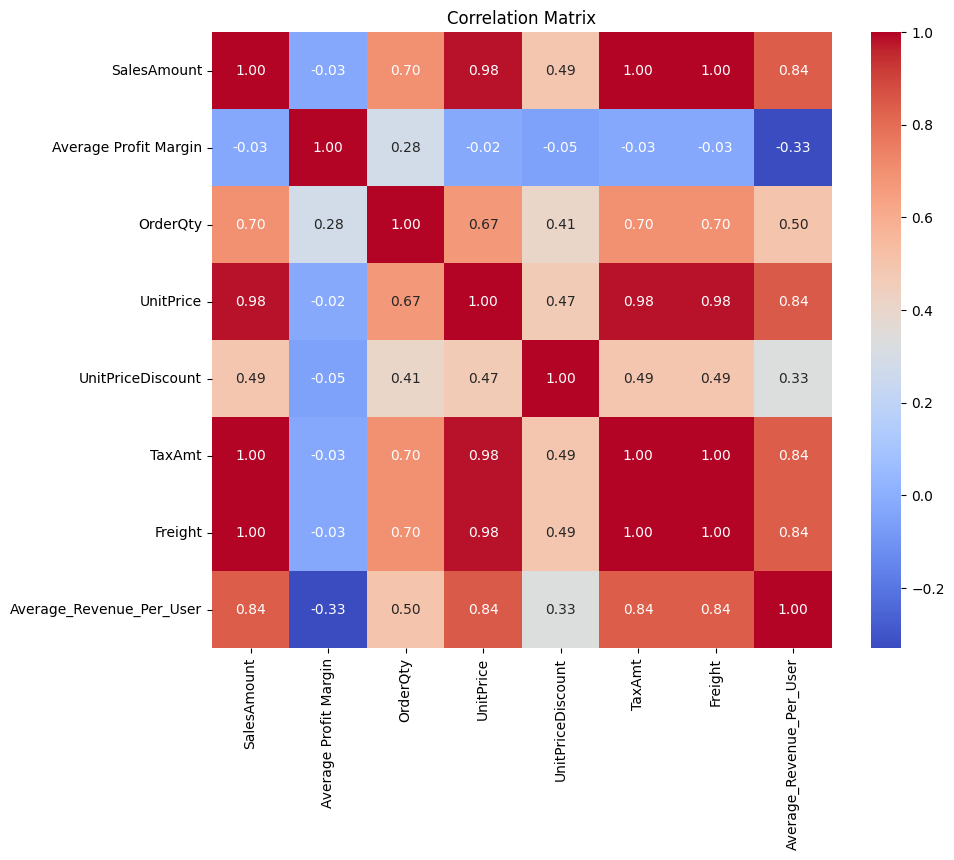

In [28]:
import numpy as np

# Correlation matrix and heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Text(0.5, 1.02, 'Pairwise Scatter Plots')

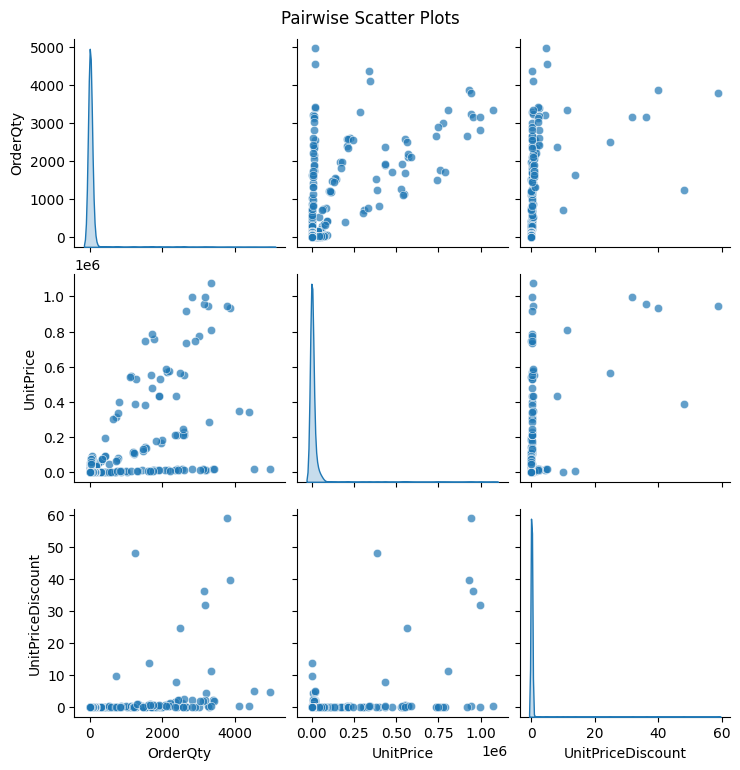

In [29]:
selected_features = ['OrderQty', 'UnitPrice', 'UnitPriceDiscount']

sns.pairplot(df[selected_features], diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.7})

plt.suptitle("Pairwise Scatter Plots", y=1.02)

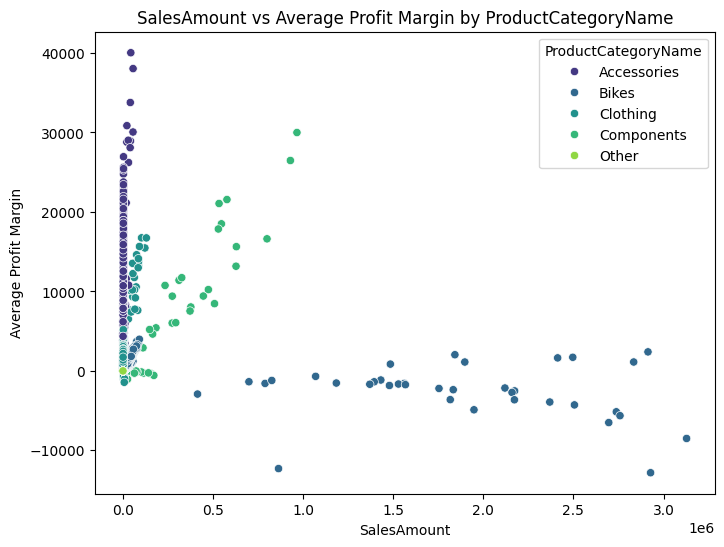

In [32]:
# Scatter plot: SalesAmount vs Average Profit Margin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SalesAmount', y='Average Profit Margin', hue='ProductCategoryName', palette='viridis')
plt.title('SalesAmount vs Average Profit Margin by ProductCategoryName')
plt.show()


In [34]:
grouped_data = df.groupby('ProductCategoryName').agg({
    'SalesAmount': 'sum',
    'Average Profit Margin': 'mean',
    'OrderQty': 'sum'
}).reset_index()
print(grouped_data)


  ProductCategoryName   SalesAmount  Average Profit Margin  OrderQty
0         Accessories  1.271447e+06            5619.510830   61920.0
1               Bikes  9.459730e+07             760.060341   90221.0
2            Clothing  2.119739e+06             905.353161   73651.0
3          Components  1.179625e+07             261.925826   49032.0
4               Other  0.000000e+00               0.000000       0.0


C:\Users\Khoi Nguyen\AppData\Local\Temp\ipykernel_15756\2371174970.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('ProductCategoryName').agg({


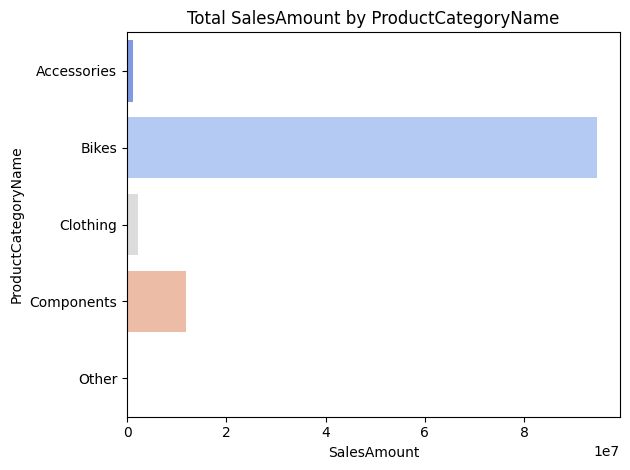

In [35]:
# Bar plot: Total SalesAmount per TerritoryID

grouped_data = df.groupby('ProductCategoryName', observed=False)['SalesAmount'].sum().reset_index()
sns.barplot(data=grouped_data, y='ProductCategoryName', x='SalesAmount', hue='ProductCategoryName', legend=False, palette='coolwarm')
plt.title('Total SalesAmount by ProductCategoryName')
plt.tight_layout()
plt.show()


In [36]:
df.columns

Index(['ProductCategoryName', 'SalesAmount', 'Average Profit Margin',
       'OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'TaxAmt', 'Freight',
       'Average_Revenue_Per_User'],
      dtype='object')

In [37]:
features = ['SalesAmount', 'Average Profit Margin','Average_Revenue_Per_User']

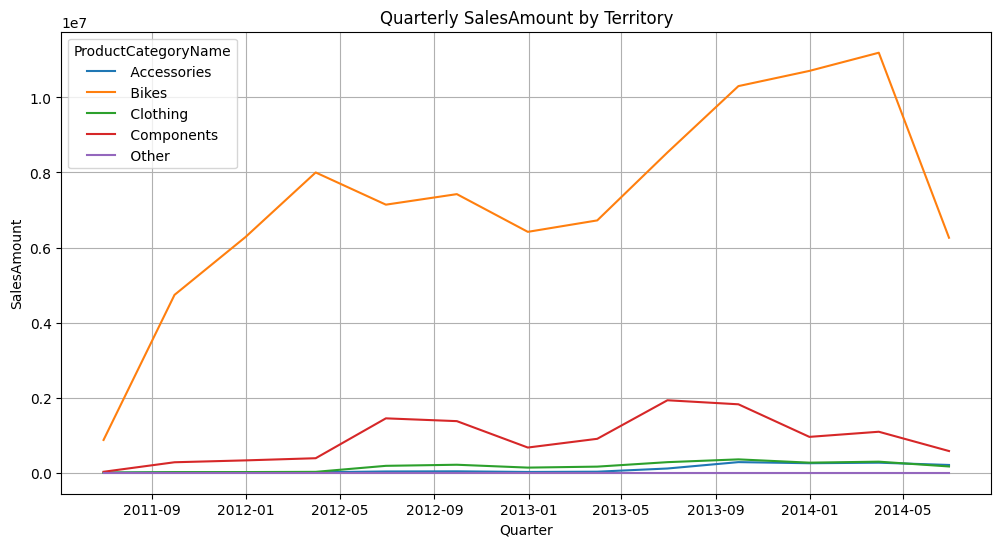

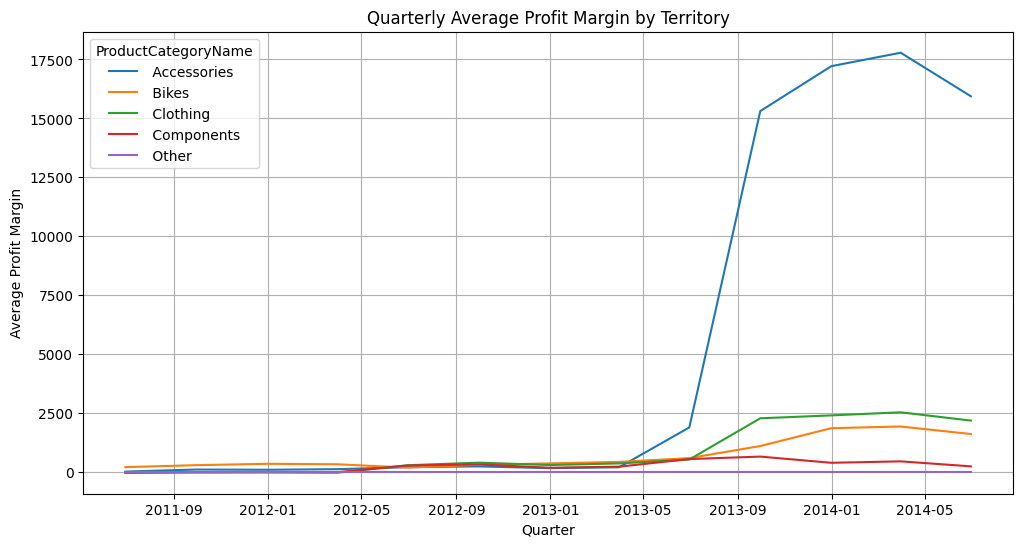

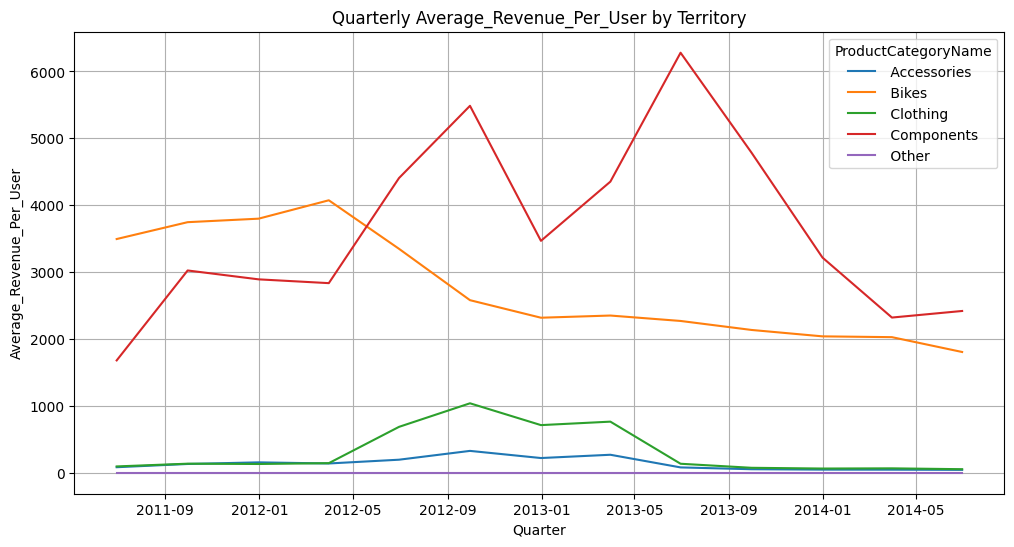

In [39]:
# Resample data to quarterly frequency and aggregate
quarterly_data = (
    df.groupby(['ProductCategoryName', pd.Grouper(freq='QE')], observed=True)  # 'Q' for quarterly aggregation
    .agg({
        'SalesAmount': 'sum',
        'Average Profit Margin': 'mean',
        'Average_Revenue_Per_User': 'mean'
    })
    .reset_index()
)

# Ensure all territories are included and group by both Quarter and TerritoryID
quarterly_data = quarterly_data.groupby(['OrderDate', 'ProductCategoryName'], observed=True).sum().reset_index()

# Plot the data
for feature in features:
    plt.figure(figsize=(12, 6))
    for territory in quarterly_data['ProductCategoryName'].unique():
        # Filter data for the current territory
        territory_data = quarterly_data[quarterly_data['ProductCategoryName'] == territory]
        if not territory_data.empty:  # Ensure there is data to plot
            plt.plot(territory_data['OrderDate'], territory_data[feature], label=f' {territory}')
    
    # Plot details
    plt.title(f'Quarterly {feature} by Territory')
    plt.xlabel('Quarter')
    plt.ylabel(feature)
    plt.legend(title='ProductCategoryName')
    plt.grid()
    plt.show()

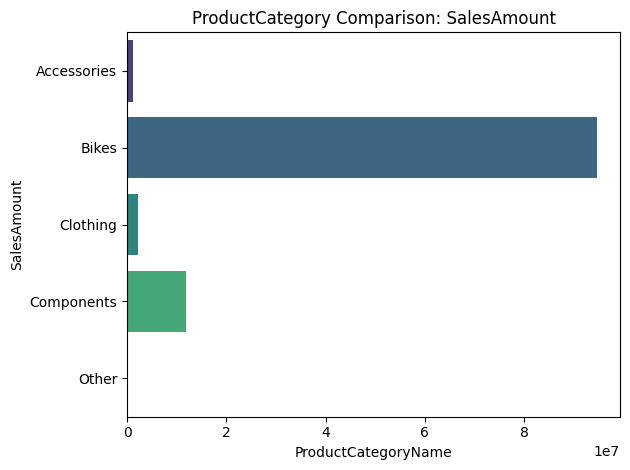

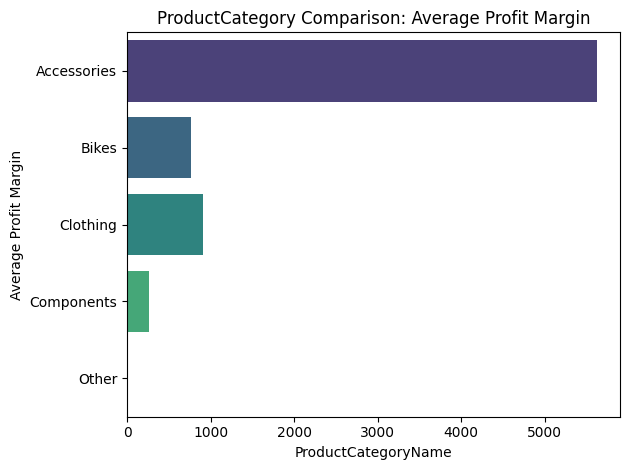

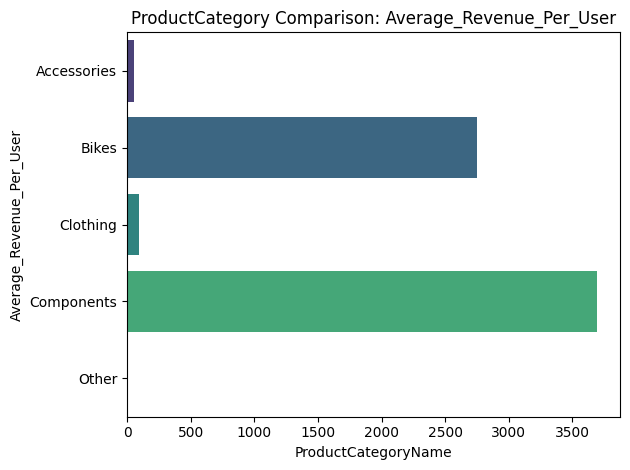

In [40]:
territory_comparison = (
    df.groupby(['ProductCategoryName'], observed=True)  # 'Q' for quarterly aggregation
    .agg({
        'SalesAmount': 'sum',
        'Average Profit Margin': 'mean',
        'Average_Revenue_Per_User': 'mean'
    })
    .reset_index()
)

for feature in features:
    sns.barplot(territory_comparison, y='ProductCategoryName', x=feature, hue='ProductCategoryName', legend=False, palette='viridis')
    plt.title(f'ProductCategory Comparison: {feature}')
    plt.xlabel('ProductCategoryName')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()